# Explore here

In [20]:
import os
import pandas as pd
import seaborn as sns
import certifi
import ssl
from dotenv import load_dotenv
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials


# load the .env file variables
load_dotenv()

#ssl_context = ssl.create_default_context(cafile=certifi.where())

print(certifi.where())
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

print(f"Client ID: {client_id}")
print(f"Client Secret: {client_secret}")


kanye_id = 'spotify:artist:5K4W6rqBFWDnAN6FQUkS6x'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
results = spotify.artist_top_tracks(kanye_id)


#results = spotify.artist_top_tracks(kanye_id)

kanye_dict = {
    'track_name':[track['name'] for track in results['tracks'][:10]],
    'track_popularity': [track['popularity'] for track in results['tracks'][:10]],
    'track_duration': [track['duration_ms'] for track in results['tracks'][:10]]
}

kanye_df = pd.DataFrame(kanye_dict)
kanye_df_popularity = kanye_df[:3].sort_values(by='track_popularity', ascending=False)
print(kanye_df_popularity)
#for track in results['tracks'][:10]:
 #   print('track    : ' + track['name'])
    

c:\Users\624796\Documents\4Geeks\api\interacting-with-api-python-project-tutorial\spotifyenv\Lib\site-packages\certifi\cacert.pem
Client ID: 2c8b3949929445f39308a35646814fed
Client Secret: 8a78735986fe43c6a2031cef899918f7
   track_name  track_popularity  track_duration
1   Heartless                84          211000
0    CARNIVAL                83          264324
2  FIELD TRIP                80          163155


### Scatter Plot

No we cant say popularity is directly correlated to song duration

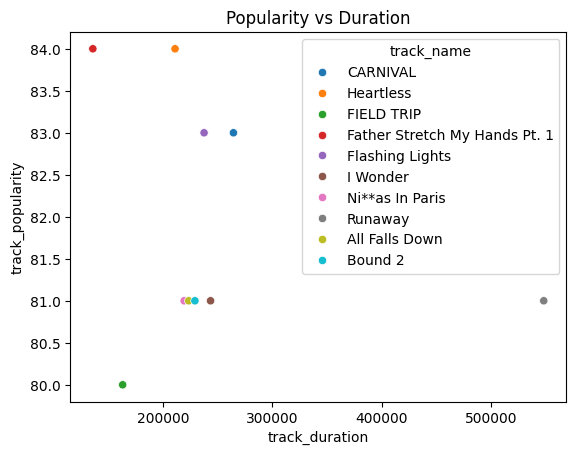

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=kanye_df, x=kanye_df['track_duration'], y=kanye_df['track_popularity'], hue=kanye_df['track_name'])
plt.title('Popularity vs Duration')
plt.show()